# Introduction to the Book Recommendation System Project:

In the digital era, where the abundance of literature can be both a blessing and a challenge, the need for a sophisticated Book Recommendation System becomes increasingly evident. Navigating the vast world of books often results in information overload, leaving readers overwhelmed and potentially missing out on hidden gems that align with their preferences. In response to this challenge, I embark on a data-driven journey to design and implement an intelligent Book Recommendation System that caters to individual tastes and enriches the overall reading experience.

**Overview:**

The Book Recommendation System aims to revolutionize how users discover and engage with literature. Leveraging advanced data science and machine learning techniques, this platform will analyze user behavior, book metadata, and historical interactions to generate personalized book recommendations. This system seeks to not only streamline the book discovery process but also foster a sense of community and satisfaction among users.

**Problem Statement:**

The primary challenge addressed by this project is the overwhelming nature of extensive book catalogs, hindering users from efficiently finding books that resonate with their preferences. Traditional search methods may not capture the nuanced tastes of readers, leading to missed opportunities for engagement and sales. The absence of a personalized recommendation system can result in a suboptimal user experience and limit the potential for expanding the user base.

**Objectives:**

1. **Personalized Recommendations:**
   - Develop a recommendation system that tailors book suggestions based on user preferences, historical reading patterns, and implicit feedback.

2. **Enhanced User Engagement:**
   - Increase user engagement by providing relevant and diverse book recommendations, encouraging users to explore new genres and authors.

3. **Platform Differentiation:**
   - Differentiate our book platform by offering a unique and intelligent recommendation feature, setting our service apart from competitors.

4. **Data-Driven Insights:**
   - Utilize data-driven insights to understand user behavior,and emerging literary trends, informing strategic decisions.

**Success Metrics:**

Root Mean Squared Error of close to 0 to evaluate model efficiency.

**Methods:**

1. **Collaborative Filtering:**
   - Implement collaborative filtering techniques to identify patterns and preferences by analyzing user interactions and preferences.

2. **Content-Based Filtering:**
   - Leverage content-based filtering to recommend books based on the intrinsic features of the books themselves and align them with user preferences.

3. **Machine Learning Models:**
   - Develop machine learning models to predict user preferences and recommend books that are likely to resonate with individual users.

**Project Goals:**
* Develop a prediction model within the book recommendation system that can accurately recommend a particular book, based on preferences of similar users
* Establish evaluation metrics to assess the performance of the recommendation system.
* Create a function that will return top N recommendations for a user.
* Deploy and Implement a real-time recommendation feature that can adapt to users' changing preferences and provide up-to-date book suggestions.

**Data Understanding:**

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/rajkumardubey10/amazon-book-dataset30000-books-with-30-category)

1. Book Name:
- Description: The title or name of the book.
- Role: Identifies the book within the dataset.
2. Book Price:
- Description: The cost associated with purchasing the book.
- Role: Provides information on the financial aspect of the book.
3. Book Author:
- Description: The name of the author(s) who wrote the book.
- Role: Identifies the individual or individuals responsible for creating the content.
4. Book Release Date:
- Description: The date when the book was officially released or published.
- Role: Provides temporal information about the book.
5. Book Rating:
- Description: A numerical or categorical representation of the book's overall rating.
- Role: Offers an indication of the book's reception and popularity.
6. Book Image Source Link:
- Description: A link pointing to the source of the book's cover image.
- Role: Facilitates visual representation and identification of the book through its cover.


In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.prediction_algorithms import KNNWithMeans
from surprise.model_selection import GridSearchCV



In [2]:
# Loading the dataset.
df = pd.read_csv('data/merged_dataset.csv', on_bad_lines='skip')
df

,Book_Name,Book_Price,Book_Author,Book_Rating,Book_release_date,Book_Image
0,Dr Cuterus: Everything Nobody Tells You: Every...,192,Dr Tanaya Narendra,512,12 December 2022,https://m.media-amazon.com/images/I/81RMLBE+sH...
1,MTG Objective NCERT at your FINGERTIPS Biology...,182.,MTG Editorial Board,6,19 October 2023,https://m.media-amazon.com/images/I/81nkH5ZjqZ...
2,Relativity: The Special And The General Theory...,0,Albert Einstein,"4,583",15 June 2017,https://m.media-amazon.com/images/I/712UNxm026...
3,Black Holes (L) : The Reith Lectures [Paperbac...,697,Stephen Hawking,"7,573",11 July 2016,https://m.media-amazon.com/images/I/91elhBJsIT...
4,MTG Objective NCERT at your FINGERTIPS Chemist...,149,MTG Editorial Board,12,19 October 2023,https://m.media-amazon.com/images/I/81s-tTkv2R...
...,...,...,...,...,...,...
33500,Mathematics for Class 10 - CBSE - by R.D. Shar...,98,NaN,NaN,NaN,https://m.media-amazon.com/images/W/MEDIAX_792...
33501,"NCERT , CLASS - 11 SET OF 5 BOOKS ( PHYSICS PA...",484,NaN,NaN,NaN,https://m.media-amazon.com/images/W/MEDIAX_792...
33502,Oxford Handbook Of Clinical Medicine 10 Xe,170,NaN,NaN,NaN,https://m.media-amazon.com/images/W/MEDIAX_792...
33503,MTG International Mathematics Olympiad (IMO) W...,516,NaN,NaN,NaN,https://m.media-amazon.com/images/W/MEDIAX_792...


In [3]:
class DataAnalyzer:
    
    # initialize object
    def __init__(self, df):
        self.df = df
        
    # a function to check the shape of the data
    def shape(self):
        return f'The Dataframe has:\n\t* {self.df.shape[0]} rows\n\t* {self.df.shape[1]} columns\n'
    
    # A function to check the info of the dataset
    def info(self):
        return str(self.df.info()) + '\n'
    
    # A function to describe the numerical column
    def describe(self):
        return str(self.df.describe().T) + '\n'


In [4]:
# creating an instance of the class
data_analyzer = DataAnalyzer(df)

# Print the shape of the DataFrame
print(data_analyzer.shape())


The Dataframe has:
	* 33505 rows
	* 6 columns



In [5]:
# Get and print information about the dataset
info_result = data_analyzer.info()
print(info_result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33505 entries, 0 to 33504
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Book_Name          33505 non-null  object
 1   Book_Price         33505 non-null  object
 2   Book_Author        27830 non-null  object
 3   Book_Rating        32380 non-null  object
 4   Book_release_date  32729 non-null  object
 5   Book_Image         33505 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB
None



In [6]:
# Get and print the description of numerical columns
describe_result = data_analyzer.describe()
print(describe_result)

                   count unique  \
Book_Name          33505  25540   
Book_Price         33505   4141   
Book_Author        27830   8139   
Book_Rating        32380   7261   
Book_release_date  32729   5038   
Book_Image         33505  30076   

                                                                 top  freq  
Book_Name                 Asterix Album 40: Asterix & the White Iris     9  
Book_Price                                                         0  8666  
Book_Author                                                 Audio CD  2660  
Book_Rating                                                        1   614  
Book_release_date                                     1 January 2023   579  
Book_Image         https://m.media-amazon.com/images/I/01RPy1Sfeq...     6  



## Observation
From the above analysis I got the following results and some potential actions that I will consider including in this notebook:


1. **General Overview:**
   - The dataset contains 33,505 rows and 6 columns.
   - The columns include information about book names, prices, authors, ratings, release dates, and image URLs.

2. **Data Types:**
   - All columns are currently of object (string) data type, which may need adjustment based on the actual content of the columns.
   - I will consider converting 'Book_Price', 'Book_Rating', and 'Book_release_date' to appropriate data types (i.e., numeric and datetime).

3. **Missing Values:**
   - 'Book_Author', 'Book_Rating', and 'Book_release_date' have missing values.
   - I will consider strategies for handling missing values, such as imputation or dropping rows/columns.

4. **Unique Values:**
   - 'Book_Name' has 25,540 unique values, suggesting diversity in book titles.
   - 'Book_Price' has 4,141 unique values, indicating a variety of prices.
   - 'Book_Author' has 8,139 unique values, showcasing a diverse set of authors.
   - 'Book_Rating' has 7,261 unique values, which might include a variety of rating scales.
   - 'Book_release_date' has 5,038 unique values, indicating a wide range of release dates.
   - 'Book_Image' has 30,076 unique values, suggesting a diverse set of book cover images.

5. **Top Occurrences:**
   - 'Asterix Album 40: Asterix & the White Iris' appears frequently in 'Book_Name'.
   - '0' appears frequently in 'Book_Price', possibly indicating missing or placeholder values.
   - 'Audio CD' appears frequently in 'Book_Author', possibly indicating a specific format or type.
   - '1' appears frequently in 'Book_Rating', which may require further investigation.
   - '1 January 2023' is a frequently occurring release date, possibly indicating a default date or placeholder.
   - Some image URLs are more frequent than others.


## Data Preprocessing

1. **Actions to Consider:**
   - Convert 'Book_Price' to a numeric data type.
   - Convert 'Book_Rating' to a numeric data type, if applicable.
   - Convert 'Book_release_date' to a datetime data type.
   - Handle missing values in 'Book_Author', 'Book_Rating', and 'Book_release_date'.
   - Investigate and clean 'Book_Price', 'Book_Rating', and 'Book_release_date' columns for anomalies.

2. **Further Exploration:**
   - Explore the distribution of ratings, prices, and release dates.
   - Identify and handle outliers or anomalies in the data.
   - Visualize the distribution of book authors and their contributions.

### Data Cleaning and Converting datatypes

In [7]:
# Convert 'num_pages', 'ratings_count', and 'text_reviews_count' columns to numeric
numeric_columns = ['Book_Price', 'Book_Rating']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# checking for missing values.
def missing_values(data):
    ''' A simple function to identify if the data has missing values
    identify the total missing values in a column and their percentage 
    and sort in order'''
    miss = data.isna().sum().sort_values(ascending = False)
    
    # calculate the percentage of missing values.
    percentage_miss = ((data.isna().sum() / len(data))*100).sort_values(ascending = False)
    
    # store in a Dataframe
    missing= pd.DataFrame({'Missing Values': miss, 'Percentage(%)': percentage_miss})
    
    return missing

# Applying the function.
missing_values(df)

,Missing Values,Percentage(%)
Book_Rating,11548,34.466498
Book_Author,5675,16.937770
Book_Price,4943,14.753022
Book_release_date,776,2.316072
Book_Name,0,0.000000
Book_Image,0,0.000000


**Dealing with the missing values**

1. **Book_Author:**
   - **Imputation:** I will replace missing 'Book_Author' values with the placeholder of "Unknown"

In [9]:
# Imputation
df['Book_Author'].fillna('Unknown', inplace=True)

2. **Book_Rating:**
   - **Imputation:** I will replace missing 'Book_Rating' values with the placeholder of 0 "Unrated"

In [10]:
# Imputation
df['Book_Rating'].fillna('Unrated', inplace=True)

3. **Book_release_date:**
   - **Imputation:** I will convert 'Book_release_date' to a datetime column, and impute missing values with the  mode of the column.


In [11]:
# Imputation and converting 'Book_release_date' to a datetime column
df['Book_release_date'] = pd.to_datetime(df['Book_release_date'], errors='coerce')
df['Book_release_date'].fillna(df['Book_release_date'].mode().iloc[0], inplace=True)



4. **Book_Prices:**
   - **Imputation:** I will impute the missing values with the  placeholder 0 for the column.


In [12]:
# Impute missing 'Book_Price' with a placeholder value
df['Book_Price'] = pd.to_numeric(df['Book_Price'], errors='coerce')
df['Book_Price'].fillna(0, inplace=True)

4. **Reviewing Results:**
   - After handling missing values, I'll check for missing values again to ensure that the data is clean.

In [13]:
# Check for missing values after handling
missing_values_after_handling = missing_values(df)
print(missing_values_after_handling)


                   Missing Values  Percentage(%)
Book_Name                       0            0.0
Book_Price                      0            0.0
Book_Author                     0            0.0
Book_Rating                     0            0.0
Book_release_date               0            0.0
Book_Image                      0            0.0


In [14]:
# Checking for duplicates
df.duplicated().sum()

1

In [15]:
# View the duplicated row(s)
duplicated_rows = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows)

# Drop one of the duplicated rows
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
print("Duplicates After Dropping:")
print(df.duplicated().sum())


Duplicated Rows:
                                     Book_Name  Book_Price    Book_Author  \
29974  How to Win Friends and Influence People        99.0  Dale Carnegie   

      Book_Rating Book_release_date  \
29974     Unrated        2020-10-12   

                                              Book_Image  
29974  https://m.media-amazon.com/images/W/MEDIAX_792...  
Duplicates After Dropping:
0


In [16]:
# Check data types
print(df.dtypes)


Book_Name                    object
Book_Price                  float64
Book_Author                  object
Book_Rating                  object
Book_release_date    datetime64[ns]
Book_Image                   object
dtype: object


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Book_Price,33504.0,225.487404,250.147184,0.0,0.0,177.0,374.0,999.0


### Exploratory Data Analysis 


Here I will try to analyze:

1. **Distribution of Ratings:**
   - Visualize the distribution of book ratings.
   - Identify the most common ratings and their frequency.
   - Check for outliers or unusual patterns in the rating distribution.

2. **Author Analysis:**
   - Explore the distribution of books across different authors.
   
3. **Temporal Analysis:**
   - Examine the distribution of books over time using the publication date.
   - Identify trends or patterns in the publication of books.
   
9. **Top-N Analysis:**
   - Identify the top N books with the highest ratings, or other relevant criteria.
   - Explore whether there are commonalities among top-rated books.

11. **Word Clouds:**
    - Generate word clouds for book titles, author names, or genres to visually represent the most frequent terms.
    - Identify popular themes or topics in the dataset.

12. **Outlier Detection:**
    - Use box plots or other visualization techniques to identify outliers in numerical features.
    - Assess the impact of outliers on the analysis and consider whether they should be handled.



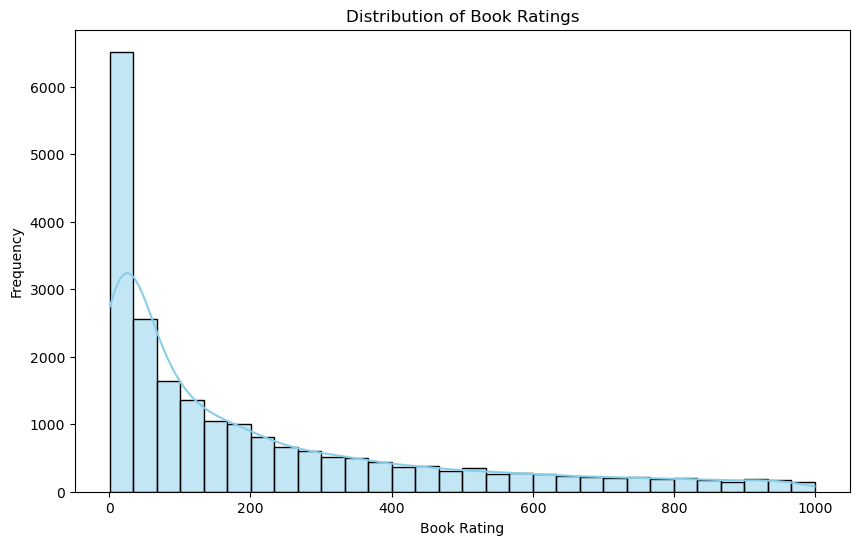

Top 10 Most Common Ratings:
1.0     614
2.0     538
3.0     360
4.0     325
5.0     301
6.0     285
7.0     249
8.0     225
11.0    205
9.0     204
Name: Book_Rating, dtype: int64


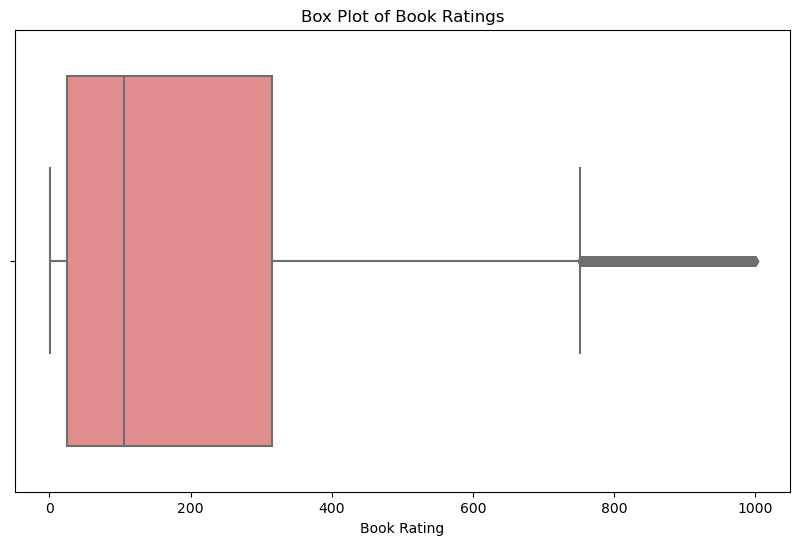

In [18]:
# Exclude 'Unrated' values from the 'Book_Rating' column
filtered_ratings = df['Book_Rating'][df['Book_Rating'] != 'Unrated']

# Convert the filtered ratings to numeric values
numeric_ratings = pd.to_numeric(filtered_ratings, errors='coerce')

# Step 1: Visualize the distribution of ratings using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(numeric_ratings, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Frequency')
plt.show()

# Step 2: Identify the most common ratings and their frequency
most_common_ratings = numeric_ratings.value_counts().head(10)
print("Top 10 Most Common Ratings:")
print(most_common_ratings)

# Step 3: Check for outliers or unusual patterns using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_ratings, color='lightcoral')
plt.title('Box Plot of Book Ratings')
plt.xlabel('Book Rating')
plt.show()



The ratings are incredibly skewed, with the bulk of them being zero.
It is evident that the data is skewed to the left indicating that very few books were rated by the majority of the users, there are also a few outliers of books that have been rated by majority of the people.

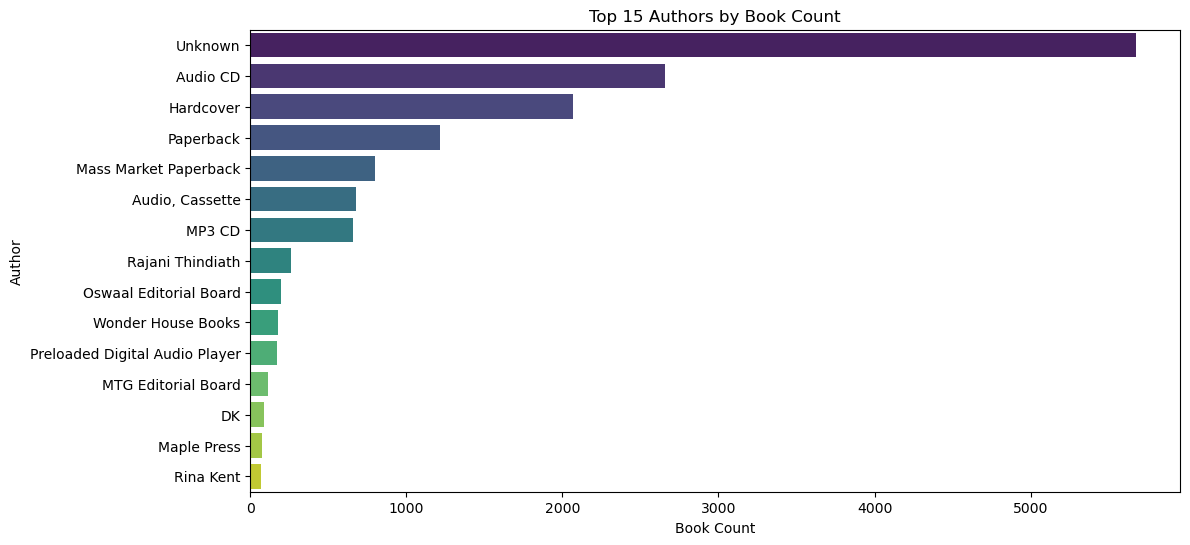

In [19]:
# Distribution of author column named 'Book_Author'
authors_counts = df['Book_Author'].value_counts().head(15)

# Plot the distribution of books across authors
plt.figure(figsize=(12, 6))
sns.barplot(x=authors_counts.values, y=authors_counts.index, palette='viridis')
plt.title('Top 15 Authors by Book Count')
plt.xlabel('Book Count')
plt.ylabel('Author')
plt.show()


Most of the books are audio books as we can see in the plot above and some outstanding authors include Rajani Thindiath,Oswaal, wonder House, among others.

In [20]:
popular_authors = df['Book_Author'].value_counts().head(15)
print("Top 15 Popular Authors:")
print(popular_authors)

Top 15 Popular Authors:
Unknown                           5675
Audio CD                          2660
Hardcover                         2067
Paperback                         1218
Mass Market Paperback              801
Audio, Cassette                    679
MP3 CD                             655
Rajani Thindiath                   259
Oswaal Editorial Board             200
Wonder House Books                 180
Preloaded Digital Audio Player     172
MTG Editorial Board                113
DK                                  88
Maple Press                         72
Rina Kent                           70
Name: Book_Author, dtype: int64


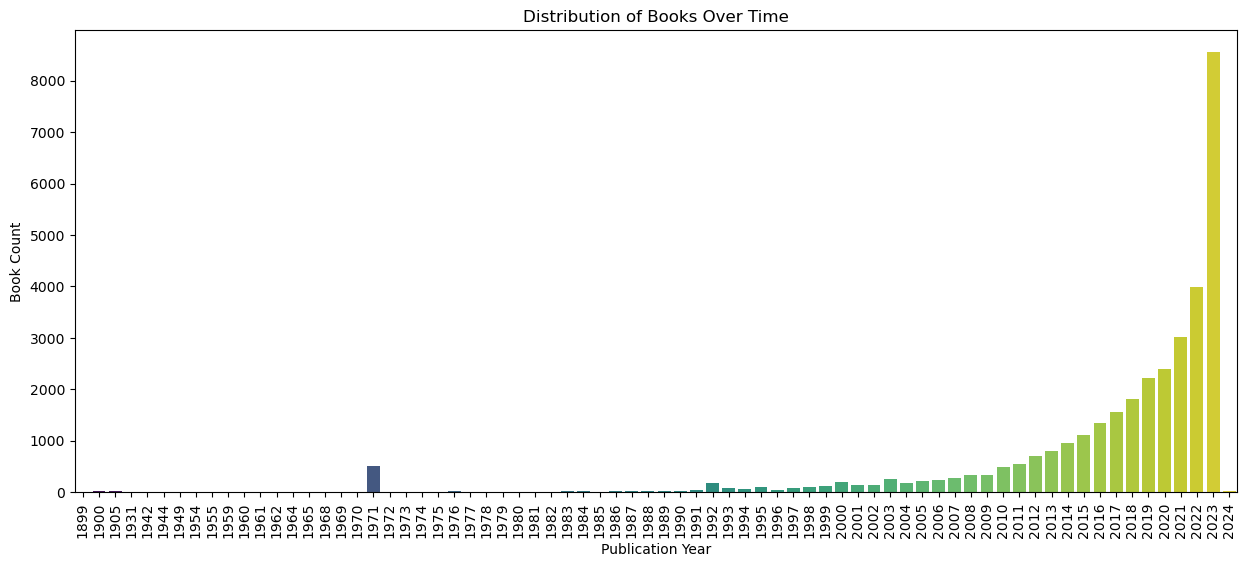

In [21]:
# Examine the Distribution of Books Over Time:
# Extract year from the publication date
df['publication_year'] = df['Book_release_date'].dt.year

# Plot the distribution of books over time
plt.figure(figsize=(15, 6))
sns.countplot(x='publication_year', data=df, palette='viridis')
plt.title('Distribution of Books Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Book Count')
plt.xticks(rotation=90)
plt.show()

Majority of the books are published in the later years since 1991 with a progressive increase of books published each consequative years.

In [22]:
# Convert 'Book_Rating' column to numeric, coercing errors to NaN
df['Book_Rating'] = pd.to_numeric(df['Book_Rating'], errors='coerce')

# Filter out rows with NaN in 'Book_Rating' (assuming you want to exclude unrated books)
df_filtered = df.dropna(subset=['Book_Rating'])

# Now, you can find the nlargest based on numeric ratings
top_rated_books = df_filtered.nlargest(10, 'Book_Rating')
print("Top-rated books:")
print(top_rated_books[['Book_Name', 'Book_Rating']])


Top-rated books:
                                               Book_Name  Book_Rating
7125     Cutting for Stone [Paperback] Verghese, Abraham        999.0
11720  Harry Potter Quiz For Kids Adults: Ultimate Fa...        999.0
19985      Turning Points : A Journey Through Challenges        999.0
28368                                       Mission R&AW        999.0
3271                       Tinkle Origins Volume 4. 1982        998.0
6081                                 Ramayana Unravelled        998.0
17576  What Got You Here Wont Get You There: How Succ...        998.0
25181  Minecraft Diary: I Survived 1370 Days And This...        998.0
26924            Adventures of Byomkesh Bakshi. Volume 2        998.0
3939   Grief Journal: My Journey Through Grief - Grie...        997.0


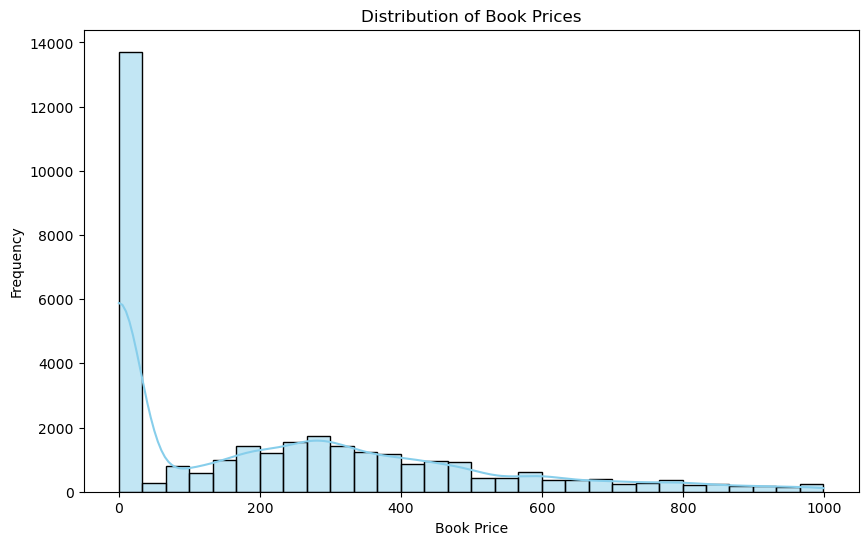

Most Expensive Book Price: 999.0
Average Book Price: 225.48740448901623


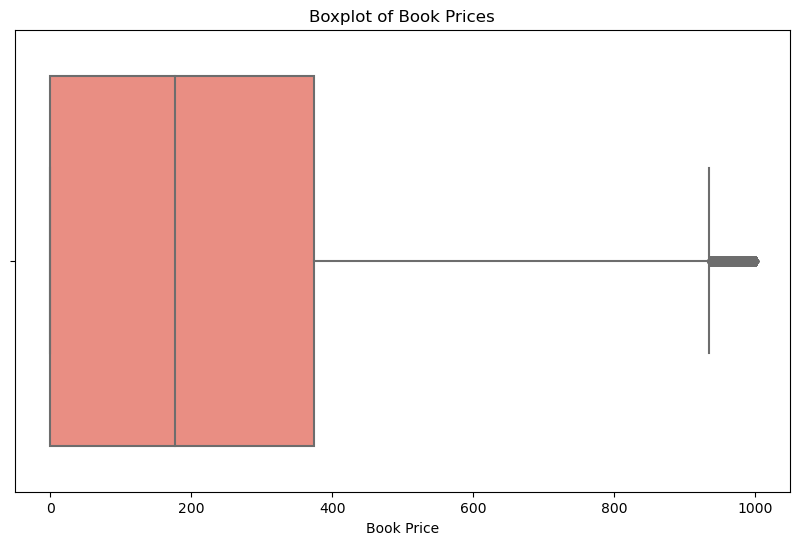

In [23]:
# Step 1: Visualize the distribution of book prices using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Book_Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Book Price')
plt.ylabel('Frequency')
plt.show()

# Step 2: Identify the most expensive and average book prices
most_expensive = df['Book_Price'].max()
average_price = df['Book_Price'].mean()

print(f"Most Expensive Book Price: {most_expensive}")
print(f"Average Book Price: {average_price}")

# Step 3: Check for outliers or unusual patterns in the price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Book_Price'], color='salmon')
plt.title('Boxplot of Book Prices')
plt.xlabel('Book Price')
plt.show()

In [24]:
# Identifying Top N Books
# Sort DataFrame by Ratings
top_rated_books = df.sort_values(by='Book_Rating', ascending=False).head(20)

top_rated_authors = top_rated_books['Book_Author'].value_counts()
print("Top-rated Authors:\n", top_rated_authors)


Top-rated Authors:
 Audio CD                 2
Maya Angelou             1
Ayaz Memon               1
Margarita Madrigal       1
Devdutt Pattanaik        1
Ed Nelson                1
Wonder House Books       1
Mass Market Paperback    1
Sally Fallon             1
Stephen Le               1
Rolf Potts               1
Amber  Row               1
Marc Reklau              1
Unknown                  1
William Nicholson        1
Takehiko Inoue           1
Prannoy Roy              1
Siddhartha Mukherjee     1
Hardcover                1
Name: Book_Author, dtype: int64


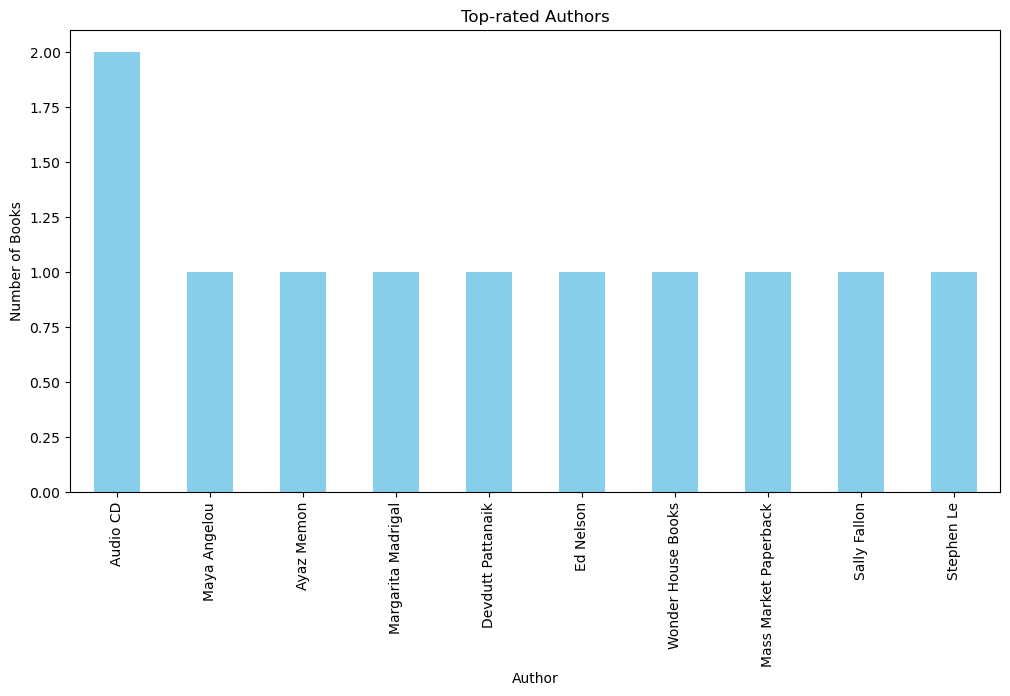

In [25]:
import matplotlib.pyplot as plt

# Bar chart for top-rated authors
plt.figure(figsize=(12, 6))
top_rated_authors[:10].plot(kind='bar', color='skyblue')
plt.title('Top-rated Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()



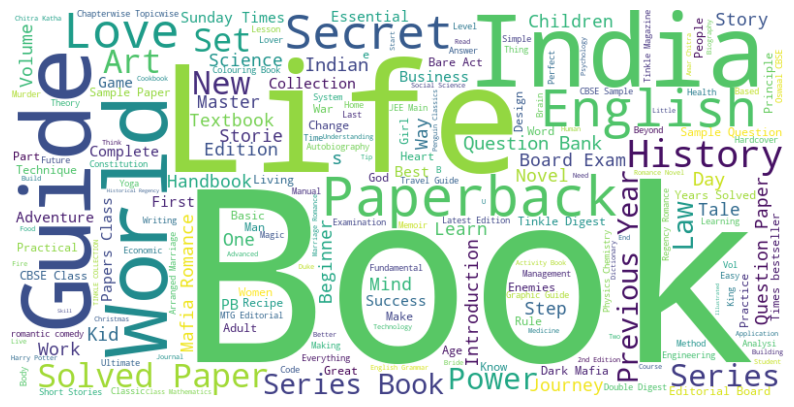

In [26]:
from wordcloud import WordCloud
# Combine relevant text data (e.g., book titles or authors)
text_data = ' '.join(df['Book_Name'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The word cloud suggests most book names revolve around words like life, love, History,and India as a nation.

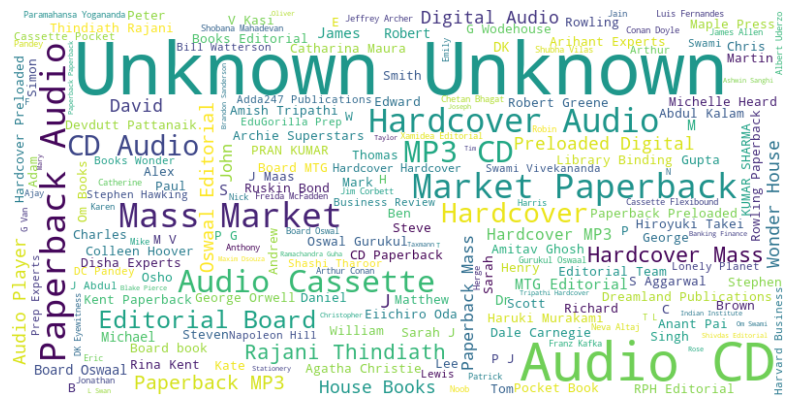

In [27]:
# Combine relevant text data (e.g., book titles or authors)
text_data = ' '.join(df['Book_Author'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


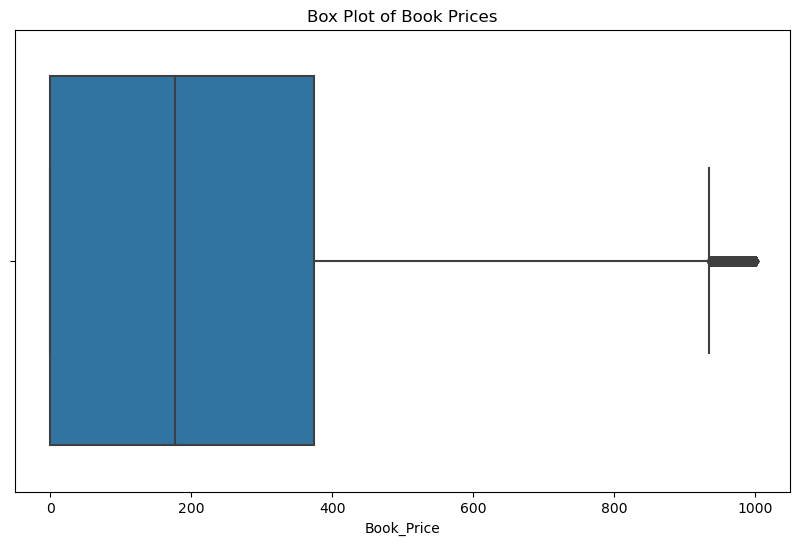

Outliers:
                                                Book_Name  Book_Price  \
28     Algorithms to Live By: The Computer Science of...       975.0   
63     Atlas of Human Anatomy, International Edition,...       974.0   
102    Fast Track Objective Arithmetic [Paperback] Ra...       961.0   
132     Schaum's Outline of Linear Algebra | 3rd Edition       946.0   
136             MALIK S C_MATHEMATICAL ANALYSIS 6E (650)       984.0   
...                                                  ...         ...   
32882  Oswaal Karnataka SSLC Question Bank Class 10 M...       999.0   
32901  Together with CBSE Class 10 Social Science Pre...       999.0   
32933  All In One Class 11th Political Science for CB...       999.0   
33063                      NCERT- 12th Biology Text Book       999.0   
33382  Textbook for Class 11 - Part 1 & 2 NCERT Accou...       999.0   

           Book_Author  Book_Rating Book_release_date  \
28           DC Pandey          NaN        2023-04-27   
63        

In [28]:
# Dealing with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Book_Price'])
plt.title('Box Plot of Book Prices')
plt.show()

q1 = df['Book_Price'].quantile(0.25)
q3 = df['Book_Price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Book_Price'] < lower_bound) | (df['Book_Price'] > upper_bound)]
print("Outliers:\n", outliers)

## Modelling


### 1. Memory Based Collaborative Filtering

>> With memory/neighborhood-based collaborative filtering methods, we are attempting to quantify just how similar users and items are to one another and getting the top N recommendations based on that similarity metric. 

In [29]:
# Using 'Book_Name', 'Book_Rating', 'Book_Author'
# Create a user-item matrix
book_pivot = df.pivot_table(index='Book_Name', columns='Book_Author', values='Book_Rating', fill_value=0)
book_pivot

Book_Author,"""Pilgrim""","""Wiley""",", Kamlesh D. Patel",3dtotal Publishing,A B de Villiers,A C Grayling,A J Hoge,A K Ramanujan,A P J Abdul Kalam,A P J Abdul Kalam,...,Zora Zade,Zora O'Neill,Zorian Cross,Zsuzsa Pontifex,\ Alex Yurich,santosh singh,sumit girdharwal,veer damodar savarkar,Åsne Seierstad,मस्त भोजाई
Book_Name,,,,,,,,,,,,,,,,,,,,,
"""Beyond the Frames: Anil Kapoor Unveiled"": From Stardom to Legacy: The Cinematic Odyssey of Anil Kapoor""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Bridging Worlds: The Stories of Indian Wives in the US"".: Life, Love, and Identity in a New Land",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""In Loving Memory"" Funeral Guest Book, Memorial Guest Book, Condolence Book, Remembrance Book for Funerals or Wake, Memorial Service Guest Book",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Jisoo: Harmony in Stardust - A Tale of Music, Grace, and Global Resonance"": ""Unveiling the Melodic Journey of a Global Icon: Her Music, Her Heart, Her Impact""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"""Mahabharata: The Great Indian Epic by Sudarshan Ray - English | Paperback | Book on Ancient Indian Stories about Pandavas and Kauravas | Kurukshetra War | Greatest Epic of India""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ஒரு மனிதன் ஒரு வீடு ஒரு உலகம் Oru Manithan Oru Veedu Oru Ulagam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"வித் லவ், மைதிலி",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ṛtu Vidyā : Ancient Science behind Menstrual Practices,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#creating a sparse matrix to fit into our model
book_sparse = csr_matrix(book_pivot)
book_sparse

<18801x6575 sparse matrix of type '<class 'numpy.float64'>'
	with 21848 stored elements in Compressed Sparse Row format>

### <span style= 'color:Blue'> 1.1 Nearest Neighbors using Cosine Similarity </span>
>> I will implement the brute force algorithm in the Nearest Neighbors class.
>> I will be using cosine similariry which determines how vectors are related to each other.

In [31]:
# instantiating Nearest Neighbors 
nearest_neighbor_model = NearestNeighbors(metric='cosine', algorithm='brute')

#fitting the model to the sparse matrix
model = nearest_neighbor_model.fit(book_sparse)

In [32]:
def recommend_book(book_name):
    """Define a function to recommend books based on a given book name."""

    # Check if the input book name is in the book_pivot index
    if book_name in book_pivot.index:
        
        # Find the index of the input book name in the book_pivot index array
        book_id = np.where(book_pivot.index == book_name)[0][0]

        # Compute the distances and suggestions using the nearest_neighbor_model
        distances, suggestions = nearest_neighbor_model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

        # Iterate over each suggestion
        for i in range(len(suggestions)):
            
            # Retrieve the book names from the book_pivot index based on the suggestions
            books = book_pivot.index[suggestions[i]]

            # Print the recommended book names
            print(f"Books similar to '{book_name}':")
            for j in books:
                print(j)
    else:
        print(f"Book '{book_name}' not found in the dataset.")

# Specify the book name for which recommendations will be made
book_name = 'The Coming Wave'

# Call the recommend_book function with the specified book name
recommend_book(book_name)


Books similar to 'The Coming Wave':
The Coming Wave
War Room: The people, Tactics and Technology Behind Narendra Modi's 2014 Win
How to Be a Bawse: A Guide to Conquering Life
Musical Tables: Poems
The Warehouse
Case Study Handbook, Revised Edition: A Student's Guide


### <span style= 'color:blue'> 1.2 KNNwithMeans </span>
>> This algorithm leverages neighborhood information, handles user or item biases through rating adjustment, and aims to provide accurate predictions for rating prediction tasks in collaborative filtering.

>> We wil be using pearson similarity matrix

In [33]:
# Import necessary libraries
from surprise import KNNWithMeans
from surprise import accuracy

df.dropna(inplace=True)
# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 1000))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df[['Book_Author', 'Book_Name', 'Book_Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Specify similarity metrics and user-based approach for KNNWithMeans
sim_options = {'name': 'pearson', 'user_based': True}

# Instantiate KNNWithMeans with the specified similarity options
knn_means = KNNWithMeans(sim_options=sim_options)

# Train the KNNWithMeans model on the training set
knn_means.fit(trainset)

# Make predictions on the test set
predictions = knn_means.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 252.7492
RMSE: 252.74915180022091


The model has successfully computed the Pearson similarity matrix. This matrix represents the similarity between different users or items based on their ratings.

**Interpretation of RMSE:**
Provide some context for the RMSE value. A lower RMSE generally indicates better model performance. However, the interpretation depends on the scale of your ratings. In this case, with a rating scale from 1 to 999, a 252.7492 RMSE suggests that, on average, the model's predictions are off by about 25% of the rating scale.

### 2. Model Based Collaborative Filtering Recommender 

>> Model based collaborative filtering approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in a lower-dimensional space.
The goal of this section is to compare SVD and SVDpp algorithms, try optimizing parameters and explore obtained results.Let's start by preparing our dataset for modelling

Filtering the data to ensure its quality before applying model-based collaborative filtering is crucial for obtaining meaningful and accurate recommendations. 

In [34]:
# Remove outliers based on ratings
q_low = df['Book_Rating'].quantile(0.01)
q_high = df['Book_Rating'].quantile(0.99)
df = df[(df['Book_Rating'] >= q_low) & (df['Book_Rating'] <= q_high)]


In [35]:
# Filter out books published before a certain year
min_year = 2000
df = df[df['Book_release_date'].dt.year >= min_year]


### 1. SVD (Singular Value Decomposition) 

>> Fitting Singular Value Decomposition (SVD) for recommendation involves using matrix factorization to decompose the user-item interaction matrix into three matrices: user matrix, item matrix, and singular values.
>> SVD is a widely used matrix decomposition method that works by reducing dimensionality of the user item matrix by extracting its latent factors and capturing underlying patterns.

In [37]:
# Import necessary libraries
from surprise import SVD
from surprise import accuracy

# with columns: 'Book_Author', 'Book_Name', 'Book_Rating'
# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 999))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df[['Book_Author', 'Book_Name', 'Book_Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Instantiate the SVD model
svd_model = SVD()

# Train the SVD model on the training set
svd_model.fit(trainset)

# Make predictions on the test set
predictions = svd_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 709.1353
RMSE: 709.1353292056069


The RMSE value is quite large, suggesting that the predicted ratings differ significantly from the actual ratings in your test set. This might indicate that the model is not capturing the underlying patterns in the data well.

### 1.SVDpp 
>> The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

In [38]:
from surprise import SVDpp


# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 999))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df[['Book_Author', 'Book_Name', 'Book_Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Instantiate the SVD++ model
svdpp_model = SVDpp()

# Train the SVD++ model on the training set
svdpp_model.fit(trainset)

# Make predictions on the test set
predictions = svdpp_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


RMSE: 727.0047
RMSE: 727.0047408648907


The test_RMSE for SVD is much more better. We will go ahead and do some hyperparameter tuning on the SVD model

### Optimizing SVD Model

In [39]:
from surprise.model_selection import GridSearchCV

# Create a Reader object and specify the rating scale
reader = Reader(rating_scale=(1, 999))  # Adjust the rating scale based on your dataset

# Load the dataset from the DataFrame using the Reader object
data = Dataset.load_from_df(df[['Book_Author', 'Book_Name', 'Book_Rating']], reader)

# Define the parameter grid
param_grid = {'n_factors': [10, 100, 500],
              'n_epochs': [5, 10, 15],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.02, 0.1, 0.2]}

# Instantiate the SVD model
svd = SVD()

# Instantiate GridSearchCV with the SVD model and parameter grid
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Perform grid search
grid_search.fit(data)

# Print the best RMSE score and the corresponding parameters
print(f"Best RMSE Score: {grid_search.best_score['rmse']}")
print(f"Best Parameters: {grid_search.best_params['rmse']}")


Best RMSE Score: 670.8966411206599
Best Parameters: {'n_factors': 10, 'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.02}


Great! I have reduced RMSE, which is an indication of improved performance.

In [40]:
from surprise.model_selection import RandomizedSearchCV

param_dist = {'n_factors': [80, 100, 120],
              'n_epochs': [3, 5, 7],
              'lr_all': [0.001, 0.002, 0.003],
              'reg_all': [0.01, 0.2, 0.03]}

random_search = RandomizedSearchCV(SVD, param_distributions=param_dist, measures=['rmse'], n_iter=10, cv=3)
random_search.fit(data)

print(f"Best RMSE Score: {random_search.best_score['rmse']}")
print(f"Best Parameters: {random_search.best_params['rmse']}")


Best RMSE Score: 668.7676257004018
Best Parameters: {'n_factors': 100, 'n_epochs': 3, 'lr_all': 0.002, 'reg_all': 0.03}


In [41]:
# Instantiate the SVD model with the best parameters
best_svd_model = SVD(n_factors=80, n_epochs=3, lr_all=0.001, reg_all=0.03)

# Train the SVD model on the full training set
best_svd_model.fit(trainset)

# Make predictions on the test set
predictions = best_svd_model.test(testset)

# Calculate and print the Root Mean Squared Error (RMSE) using the predictions
rmse = accuracy.rmse(predictions)
print(f"New RMSE: {rmse}")


RMSE: 671.3379
New RMSE: 671.3379266293787


Choosing the right recommendation model depends on various factors, and the decision is influenced by your specific use case, data characteristics, and computational resources.
1. **KNNWithMeans:**
   - **Justification:**
     - KNNWithMeans is a user-based collaborative filtering algorithm that considers neighborhood information and handles biases through rating adjustment.
     - It is easy to implement and interpret.
     - Suitable for small to medium-sized datasets.

   - **Implications:**
     - May perform well when users have similar tastes and preferences.
     - Provides transparency, as recommendations are based on the preferences of similar users.

   - **Limitations:**
     - Scalability can be an issue for larger datasets.
     - Cold start problem: New users or items with limited interaction history may not receive accurate recommendations.

2. **SVD (Singular Value Decomposition):**
   - **Justification:**
     - SVD is a matrix factorization method that works well for collaborative filtering.
     - It captures latent factors and underlying patterns in the user-item interaction matrix.
     - Effective for handling sparsity in the data.

   - **Implications:**
     - Can provide accurate recommendations by reducing dimensionality.
     - Suitable for datasets with explicit ratings.

   - **Limitations:**
     - May struggle with implicit feedback or binary interactions.
     - Computationally intensive for large datasets.

3. **SVDpp (SVD++):**
   - **Justification:**
     - SVD++ extends SVD to incorporate implicit feedback, providing a more nuanced understanding of user preferences.
     - Suitable for scenarios where implicit feedback is crucial.

   - **Implications:**
     - Can potentially improve accuracy by considering implicit feedback.
     - Effective for handling sparse datasets.

   - **Limitations:**
     - Increased computational complexity compared to SVD.
     - Requires careful tuning of hyperparameters.



### Conclusion:

1. **Rating Distribution and User Engagement:**
   - The rating distribution is highly skewed, indicating that a few books receive a large number of ratings. This may suggest variations in user engagement and preferences.
  
2. **Author and Book Insights:**
   - The analysis of top authors reveals popular contributors to the dataset, such as Rajani Thindiath and Oswaal Editorial Board.
  
3. **Temporal Trends:**
   - The temporal analysis shows a significant increase in book publications since 1991, indicating a growing trend in the availability of books over the years.

4. **Top-N Analysis:**
   - Identifying top-rated books provides insights into user preferences and highly regarded titles.


### Recommendations:

1. **User Engagement Strategies:**
   - Implement strategies to encourage users to rate a broader range of books to improve the representativeness of ratings.

2. **Author Engagement:**
   - Engage with popular authors, such as Rajani Thindiath and Oswaal Editorial Board, to potentially enhance the visibility of their works.

3. **Genre and Theme Exploration:**
   - Explore popular genres and themes in recent years to identify emerging trends and cater to user preferences.

4. **Quality Control:**
   - Address missing values and inconsistencies in the dataset, particularly in the 'Author' and 'Rating' columns.

### Limitations:

1. **Data Skewness:**
   - The highly skewed distribution of ratings may impact the performance of recommendation models, particularly collaborative filtering.

2. **Outliers:**
   - Outliers in book prices may affect the analysis. 

### Next Steps:

1. **Model Selection and Tuning:**
   - Explore and compare different recommendation models, considering collaborative filtering, matrix factorization, or hybrid approaches.
   - Fine-tune model parameters and conduct hyperparameter optimization for improved performance.

2. **Feature Engineering:**
- Consider additional features, such as book genres, to enhance the modeling process and capture more nuanced user preferences.

3. **User Feedback and Testing:**
   - Collect user feedback on recommendations generated by the models and iterate based on user responses.
   - Conduct A/B testing to evaluate the effectiveness of different recommendation strategies.

4. **Dynamic Recommendations:**
   - Implement dynamic recommendation systems that adapt to changing user preferences over time.

5. **Continuous Monitoring:**
   - Continuously monitor the performance of the recommendation system and update models as new data becomes available.

6. **User Personalization:**
   - Explore techniques for personalized recommendations based on individual user behavior and preferences.


## Deployment.

In [42]:
# Getting the indexes of the book names to be used in app.py app
book_names = book_pivot.index
book_names

Index(['"Beyond the Frames: Anil Kapoor Unveiled": From Stardom to Legacy: The Cinematic Odyssey of Anil Kapoor"',
       '"Bridging Worlds: The Stories of Indian Wives in the US".: Life, Love, and Identity in a New Land',
       '"In Loving Memory" Funeral Guest Book, Memorial Guest Book, Condolence Book, Remembrance Book for Funerals or Wake, Memorial Service Guest Book',
       '"Jisoo: Harmony in Stardust - A Tale of Music, Grace, and Global Resonance": "Unveiling the Melodic Journey of a Global Icon: Her Music, Her Heart, Her Impact"',
       '"Mahabharata: The Great Indian Epic by Sudarshan Ray - English | Paperback | Book on Ancient Indian Stories about Pandavas and Kauravas | Kurukshetra War | Greatest Epic of India"',
       '"Tamil Tapestry: Weaving Fluency into the Fabric of Culture and Connection": "Nurturing Roots, Bridging Borders, and Embracing the Elegance of Fluent Tamil Expression"',
       '"The AI Symphony: Navigating Innovation, Ethics, and the Future of Artificial

In [43]:
# importing necessary library
from joblib import dump, load

# pickling the recommendation models
dump(book_pivot,'book_pivot.pkl')
dump(svd, 'model.pkl')
dump(df, 'final_df.pkl')
dump(book_names, 'book_names.pkl')

['book_names.pkl']

In [44]:
from joblib import load

with open('model.pkl', 'rb') as f:
    model = load(f)


In [45]:
model